In [ ]:
import tensorflow as tlf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


In [ ]:
x_test.shape
#10000 counts of image
#32, 32 length , weight
#3 no of channels - colors

(10000, 32, 32, 3)

In [ ]:
#Train and test shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

#1 - dimentional to tranformation single arry

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#to comvert the shape y from 2d array to single array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

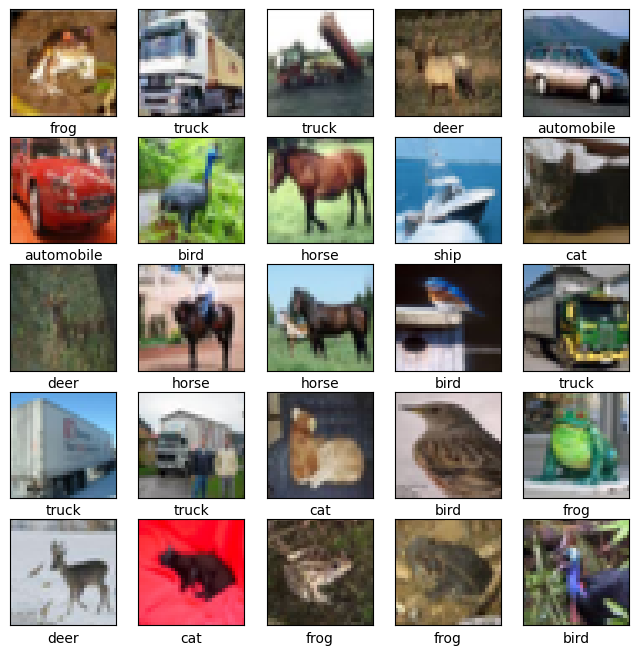

In [ ]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

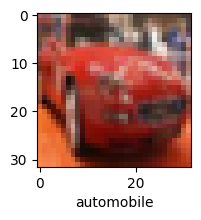

In [ ]:
plot_sample(x_train, y_train, 5)

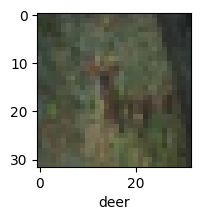

In [ ]:
plot_sample(x_train, y_train, 10)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
ann = models.Sequential([
        #input layer
        layers.Flatten(input_shape=(32,32,3)),

        #hidden layer 1
        layers.Dense(3000, activation='relu'),
        #hidden layer 2
        layers.Dense(1000, activation='relu'),

        #output layer
        layers.Dense(10, activation='sigmoid')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

hist = ann.fit(x_train, y_train, epochs = 10 )



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 305s 194ms/step - accuracy: 0.2781 - loss: 2.2265
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 190ms/step - accuracy: 0.3976 - loss: 1.6768
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 276s 177ms/step - accuracy: 0.4304 - loss: 1.5940
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 167ms/step - accuracy: 0.4438 - loss: 1.5428
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 174ms/step - accuracy: 0.4595 - loss: 1.4942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 170ms/step - accuracy: 0.4755 - loss: 1.4661
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 329s 174ms/step - accuracy: 0.4837 - loss: 1.4408
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 302s 193ms/step - accuracy: 0.4949 - loss: 1.4128
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 188ms/step - accuracy: 0.5035 - loss: 1.3881
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 286s 183ms/step - accuracy: 0.5142 - loss: 1.3528


In [ ]:
y_prob = ann.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


array([[0.24239348, 0.33712828, 0.3700795 , ..., 0.11456572, 0.45573193,
        0.18253769],
       [0.6128712 , 0.7284397 , 0.1760332 , ..., 0.17613788, 0.8694825 ,
        0.93877846],
       [0.80206805, 0.8293155 , 0.09596566, ..., 0.14543651, 0.9451369 ,
        0.871827  ],
       ...,
       [0.00141531, 0.0017837 , 0.72706276, ..., 0.1981787 , 0.22325441,
        0.02896475],
       [0.0445664 , 0.00588244, 0.66090137, ..., 0.21748531, 0.05332151,
        0.0043717 ],
       [0.4079899 , 0.0412961 , 0.5481399 , ..., 0.9042088 , 0.16102909,
        0.07796856]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([4, 9, 8, ..., 3, 4, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4917

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_prob = ann.predict(x_test)
y_pred = [np.argmax(element) for element in y_prob]
print("Classification report:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.66      0.52      0.58      1000
           2       0.39      0.31      0.35      1000
           3       0.34      0.39      0.36      1000
           4       0.42      0.46      0.44      1000
           5       0.50      0.26      0.34      1000
           6       0.45      0.62      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.56      0.68      0.61      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



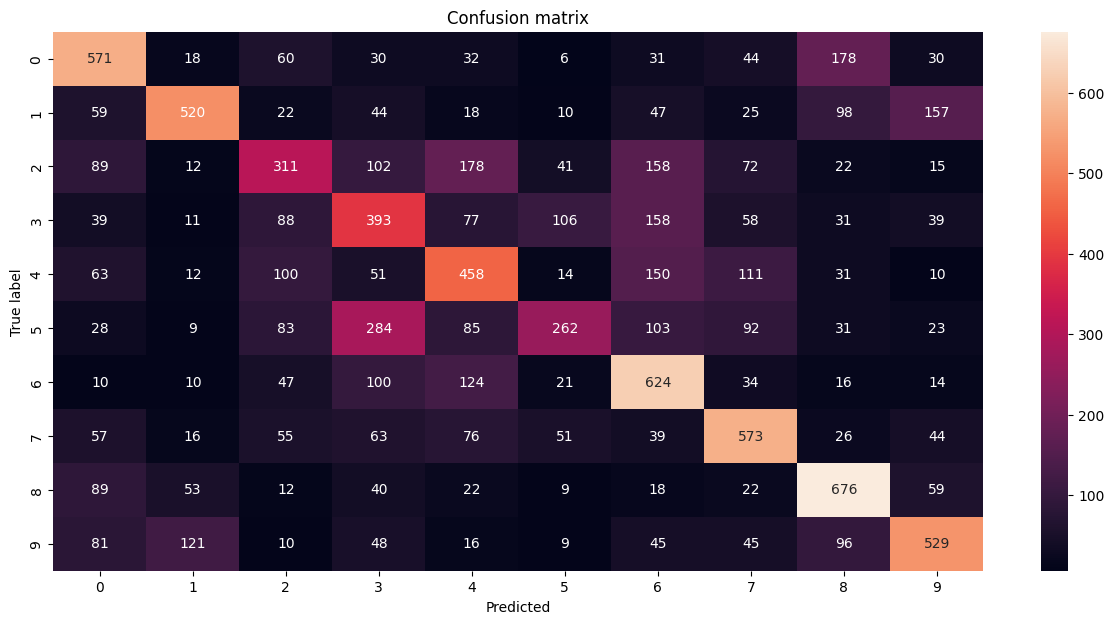

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #cnn layer
    layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #ann
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10 )



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.3612 - loss: 1.7464
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.5660 - loss: 1.2247
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6178 - loss: 1.0762
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6469 - loss: 0.9919
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.6702 - loss: 0.9343
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6919 - loss: 0.8809
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.7029 - loss: 0.8549
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7141 - loss: 0.8174
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7272 - loss: 0.7854
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.7354 - loss: 0.7551


In [ ]:
y_prob = cnn.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[7.0736138e-04, 8.6640409e-04, 5.5628596e-04, ..., 1.9521234e-05,
        6.7287278e-03, 4.8925140e-04],
       [3.4014571e-03, 7.3832162e-02, 7.1217750e-05, ..., 1.6549630e-07,
        9.1804719e-01, 4.6222131e-03],
       [7.1201898e-02, 2.3739241e-01, 2.5415665e-03, ..., 1.3937842e-04,
        6.3057357e-01, 4.0605430e-02],
       ...,
       [6.3965243e-05, 1.8867938e-07, 6.7625776e-02, ..., 1.6341690e-02,
        9.6868525e-06, 1.1895214e-06],
       [1.3406037e-01, 2.0885941e-01, 1.9884691e-02, ..., 9.1326510e-04,
        7.9059312e-03, 3.0344664e-03],
       [3.2047753e-04, 1.7072388e-04, 2.4371909e-02, ..., 9.5058781e-01,
        1.2586319e-05, 1.3219118e-04]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([3, 8, 8, ..., 5, 3, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6784

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_prob = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_prob]
print("Classification report:\n", classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.84      0.74      0.79      1000
           2       0.58      0.56      0.57      1000
           3       0.44      0.60      0.51      1000
           4       0.66      0.61      0.64      1000
           5       0.60      0.54      0.57      1000
           6       0.68      0.83      0.75      1000
           7       0.86      0.58      0.69      1000
           8       0.69      0.87      0.77      1000
           9       0.83      0.75      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



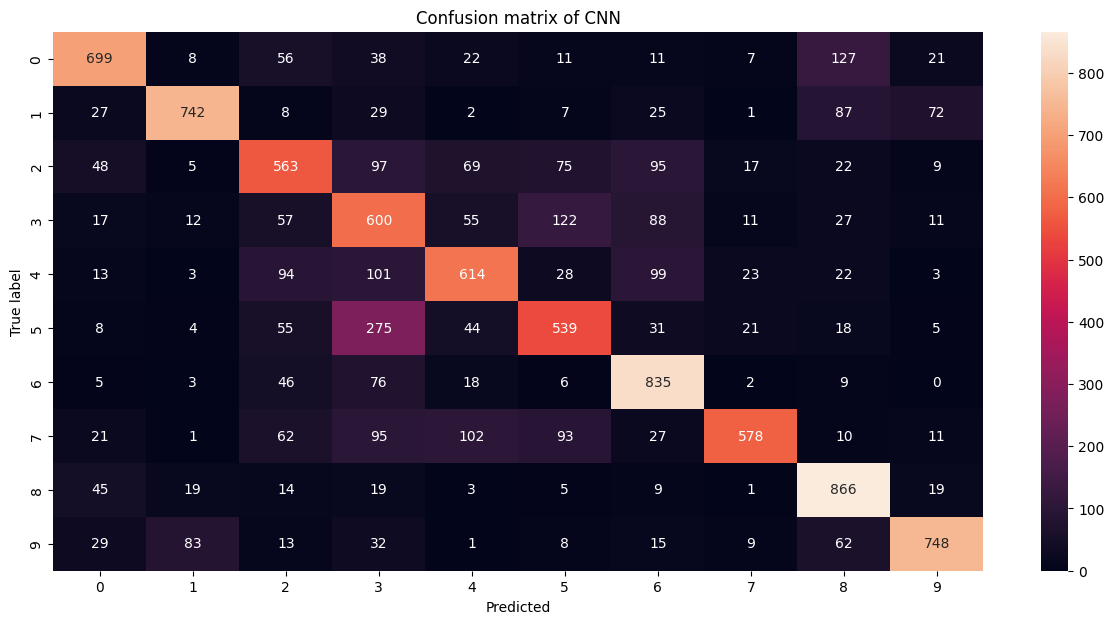

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.title('Confusion matrix of CNN')
plt.show()